In [48]:
from tensorflow import keras 

In [49]:
(X_train,y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [50]:
model = keras.models.Sequential([
    keras.layers.Normalization(-1),
    keras.layers.Flatten(input_shape=[32,32,3]),
])
for i in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

norm = model.layers[0]
norm.adapt(X_train)
    
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\LIS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], shape=(50000, 1), dtype=uint8)

In [52]:

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Nadam(learning_rate=0.00005), metrics=["accuracy"])

In [53]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.2703 - loss: 2.0531 - val_accuracy: 0.3507 - val_loss: 1.8232
Epoch 2/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3801 - loss: 1.7297 - val_accuracy: 0.3863 - val_loss: 1.7173
Epoch 3/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4264 - loss: 1.6083 - val_accuracy: 0.4121 - val_loss: 1.6574
Epoch 4/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4563 - loss: 1.5217 - val_accuracy: 0.4379 - val_loss: 1.5926
Epoch 5/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4821 - loss: 1.4508 - val_accuracy: 0.4441 - val_loss: 1.5790
Epoch 6/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5063 - loss: 1.3892 - val_accuracy: 0.4521 - val_loss: 1.5765
Epoch 7/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5240 - loss: 1.3408 - val_accuracy: 0.4596 - val_loss: 1.5506
Epoch 8/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.541

In [54]:
model2 = keras.models.Sequential([
    keras.layers.Normalization(-1),
    keras.layers.Flatten(input_shape=[32,32,3]),
])
for i in range(20):
    model2.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    model2.add(keras.layers.BatchNormalization())

norm = model2.layers[0]
norm.adapt(X_train)
    
model2.add(keras.layers.Dense(10, activation="softmax"))

In [55]:
model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Nadam(learning_rate=0.0005), metrics=["accuracy"])

In [56]:
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=150, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])



Epoch 1/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.3033 - loss: 1.9499 - val_accuracy: 0.3785 - val_loss: 1.7382
Epoch 2/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.3790 - loss: 1.7361 - val_accuracy: 0.4073 - val_loss: 1.6431
Epoch 3/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4096 - loss: 1.6589 - val_accuracy: 0.4373 - val_loss: 1.5651
Epoch 4/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4331 - loss: 1.5959 - val_accuracy: 0.4525 - val_loss: 1.5570
Epoch 5/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4516 - loss: 1.5476 - val_accuracy: 0.4732 - val_loss: 1.5010
Epoch 6/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.4666 - loss: 1.5062 - val_accuracy: 0.4801 - val_loss: 1.4650
Epoch 7/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4792 - loss: 1.4639 - val_accuracy: 0.4852 - val_loss: 1.4547
Epoch 8/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 

In [57]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4612 - loss: 1.5345


[1.5345147848129272, 0.4611999988555908]

In [58]:
model2.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5128 - loss: 1.3751


[1.3751360177993774, 0.5127999782562256]

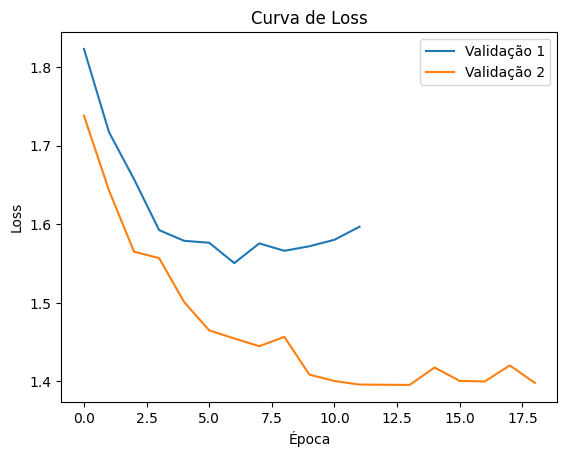

In [59]:
import matplotlib.pyplot as plt

# --- Curva de loss ---
plt.plot(history.history['val_loss'], label='Validação 1')
plt.plot(history2.history['val_loss'], label='Validação 2')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Loss')
plt.legend()
plt.show()



In [60]:
model3 = keras.models.Sequential([
    keras.layers.Normalization(-1),
    keras.layers.Flatten(input_shape=[32,32,3]),
])
for i in range(20):
    model3.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))


norm = model3.layers[0]
norm.adapt(X_train)
    
model3.add(keras.layers.Dense(10, activation="softmax"))

In [61]:
model3.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Nadam(learning_rate=0.0005), metrics=["accuracy"])

In [62]:
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=150, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.3267 - loss: 1.9022 - val_accuracy: 0.3696 - val_loss: 1.7744
Epoch 2/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4011 - loss: 1.6943 - val_accuracy: 0.4189 - val_loss: 1.6336
Epoch 3/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4303 - loss: 1.5964 - val_accuracy: 0.4182 - val_loss: 1.6187
Epoch 4/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4640 - loss: 1.5271 - val_accuracy: 0.4461 - val_loss: 1.5799
Epoch 5/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4826 - loss: 1.4650 - val_accuracy: 0.4635 - val_loss: 1.5345
Epoch 6/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5012 - loss: 1.4145 - val_accuracy: 0.4584 - val_loss: 1.5377
Epoch 7/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5230 - loss: 1.3662 - val_accuracy: 0.4719 - val_loss: 1.5256
Epoch 8/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5378 

In [63]:
model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4959 - loss: 1.4847


[1.4846701622009277, 0.4959000051021576]

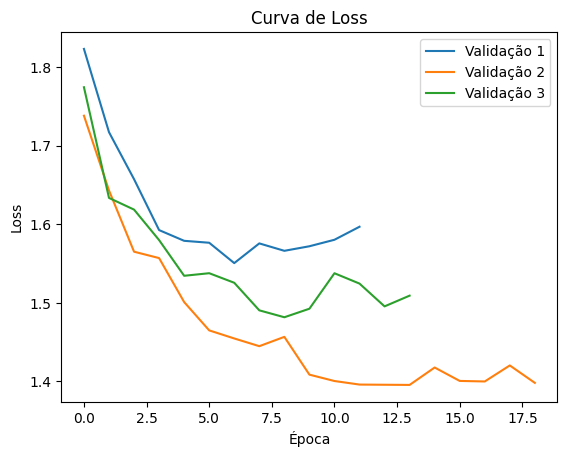

In [65]:
# --- Curva de loss ---
plt.plot(history.history['val_loss'], label='Validação 1')
plt.plot(history2.history['val_loss'], label='Validação 2')
plt.plot(history3.history['val_loss'], label='Validação 3')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Loss')
plt.legend()
plt.show()



In [66]:
model.save("model1.keras")
model2.save("model2.keras")
model3.save("model3.keras")